In [22]:
import embedding_with_glove
import plot
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, GRU, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

In [2]:
MAX_LEN = 100
DIMENSION = 300
MAX_WORDS = 10000
TEST_SIZE = 0.1

In [68]:
def model():
    model = Sequential()
    model.add(Embedding(MAX_WORDS, DIMENSION, weights = [embedding_matrix], input_length = MAX_LEN, trainable = False))
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_test, Y_test))
    plot.plot(history)
    return model

In [3]:
labels, texts = embedding_with_glove.load_text('/home/chloe/Downloads/imdb/train') 
texts_tokenized, word_index = embedding_with_glove.tokenize(texts)
X_train, X_test, Y_train, Y_test = embedding_with_glove.split(texts_tokenized, labels)
embedding_matrix = embedding_with_glove.embedding(word_index)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 100, 300)          3000000   
_________________________________________________________________
gru_4 (GRU)                  (None, 256)               427776    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 257       
Total params: 3,428,033
Trainable params: 428,033
Non-trainable params: 3,000,000
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 55s 2ms/step - loss: 0.4590 - acc: 0.7750 - val_loss: 0.3398 - val_acc: 0.8464
Epoch 2/10
22500/22500 [==============================] - 56s 2ms/step - loss: 0.3392 - acc: 0.8487 - val_loss: 0.3217 - val_acc: 0.8584
Epoch 3/10
22500/22500 [==============================] - 56s 2ms/s

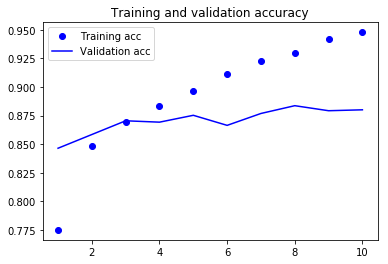

In [79]:
dnn = model()

In [77]:
def model():
    model = Sequential()
    model.add(Embedding(MAX_WORDS, DIMENSION, weights = [embedding_matrix], input_length = MAX_LEN, trainable = False))
    model.add(GRU(256, dropout = 0.1, recurrent_dropout = 0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_data = (X_test, Y_test))
    plot.plot(history)
    return model

In [13]:
def cnn_model():
    model = Sequential()
    model.add(Embedding(MAX_WORDS, DIMENSION, weights = [embedding_matrix], input_length = MAX_LEN, trainable = False))
    model.add(Conv1D(256, 3, activation = 'relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Conv1D(256, 3, activation = 'relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 128, validation_data = (X_test, Y_test))
    plot(history)


In [14]:
cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 300)          3000000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 256)           230656    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 24, 256)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 22, 256)           196864    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 3,427,777
Trainable params: 427,777
Non-trainable params: 3,000,000
____________________________________________________________

TypeError: 'module' object is not callable

In [23]:
def cnn_model_functional():
    comment_input = Input(shape = (MAX_LEN, ), dtype = 'int32')
    embedded_sequences = Embedding(MAX_WORDS, DIMENSION, weights = [embedding_matrix], input_length = MAX_LEN, trainable = False)(comment_input)
    x = Conv1D(256, 3, activation = 'relu')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(64, 3, activation = 'relu')(x)
    x = GlobalMaxPooling1D()(x)
    pred = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs = [comment_input], outputs = pred)
    model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 128, validation_data = (X_test, Y_test))
    plot.plot(history)
    
    

In [ ]:
cnn_model_functional()

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 2s 74us/step - loss: 0.5639 - acc: 0.7100 - val_loss: 0.5054 - val_acc: 0.7436
Epoch 2/10
17920/22500 [======================>.......] - ETA: 0s - loss: 0.4153 - acc: 0.8094